# Basic Introduction to Bayesian Statistics: A Coin Story

## 0. Start with some code writing

In [163]:
# Import all the necessary libraries (developer's toolboxes)
import pymc as pm
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

In [164]:
# Create a function for generating our dataset

def toss_a_coin(number_of_trials, pi=0.75):
    """Returns a list of successes (1) and failures (1) after a number of trials, if a certain probability of success, pi."""
    tosses = random.choices([1, 0], [pi, 1 - pi], k=number_of_trials)
    return tosses

## 1. Frequentist approach: null-hypothesis testing

### 1.1 First step: define our hypotheses

>**Null hypothesis, H0**: the coin is not biaised, so it has a 0.5 probability of giving heads when tossed.

>**Alternative hypothesis, H1**: the coin is biased, the probability that it gives heads might be higher or lower than 0.5.

___

`Spoiler alert`: it is biaised, the probability of heads is 0.75 and the probability of tails is 0.25

### 1.2 Second step: choosing a significance threshold

> This significance threshold should be chosen before we collect the data.
It corresponds to what we think is the acceptable probability of observing the data by mistake.

> If the threshold is 0.05, it means that we accept a 5% chance that we reject the null-hypothesis while it was actually true.

**A generally accepted threshold is 0.05**, thus we will use this for our experiment.


In [165]:
# Determine the significance threshold

chosen_alpha = 0.05

### 1.3 Third step: conducting the analysis on collected data

#### Generate the data: small sample (10 tosses)

In [166]:
# Generate the data
tosses_list_10 = toss_a_coin(10)

# Present the data
print(f"We obtained the following results: {tosses_list_10}.")
print(f"We got {sum(tosses_list_10)} heads for {len(tosses_list_10)} tosses.\n")

We obtained the following results: [0, 0, 1, 1, 0, 1, 1, 1, 1, 1].
We got 7 heads for 10 tosses.



In [167]:
# Analyse the data
result = scipy.stats.binomtest(sum(tosses_list_10), n=len(tosses_list_10), p=0.5, alternative='two-sided')

# Present the results
if result.pvalue > chosen_alpha:
    print(f"The p-value is {result.pvalue}, which is greater than 0.05. \nWe cannot reject the null hypothesis.")
else:
    print(f"The p-value is {result.pvalue}, which is less than 0.05. \nWe can reject the null hypothesis.")

The p-value is 0.34375, which is greater than 0.05. 
We cannot reject the null hypothesis.


#### Generate the data: large sample (100 tosses)

In [168]:
# Generate the data
tosses_list_100 = toss_a_coin(100)

# Present the data
print(f"We obtained the following results: {tosses_list_100}.")
print(f"We got {sum(tosses_list_100)} heads for {len(tosses_list_100)} tosses.\n")

We obtained the following results: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1].
We got 78 heads for 100 tosses.



#### Conduct the Analysis with the library Scipy and retain the p-value

In [169]:
# Analyse the data
result = scipy.stats.binomtest(sum(tosses_list_100), n=len(tosses_list_100), p=0.5, alternative='two-sided')

# Present the results
if result.pvalue > chosen_alpha:
    print(f"The p-value is {result.pvalue}, which is greater than 0.05. \nWe cannot reject the null hypothesis.")
else:
    print(f"The p-value is {result.pvalue}, which is less than 0.05. \nWe can reject the null hypothesis.")

The p-value is 1.5905328473786136e-08, which is less than 0.05. 
We can reject the null hypothesis.


### 1.4 Preliminary conclusions

- with small samples it is more difficult to obtain a significant result

## 2. Bayesian approach

### 2.1 First step: define your hypothesis

> We want to test if our coin is biaised.

> We compare two hypotheses (the coin is not biaised v.s. the coin is biased) by seeing in which hypothesis the data collected is more likely to happen 


### 2.2 Second step: define your priors

- priors represent your beliefs about your hypothesis
- based on previous research, or on your intuition about your hypothesis
- have an impact on the result

**My prior could be:**
> I have no idea about anything when it comes to this coin (uninformed)

> I think (with more or less undertainty) that the coin is unbiaissed

### 2.3 Third step: collect the data

> We will use the same samples that we used for the previous analyses.

In [198]:
print(f"10 tosses: {tosses_list_10}\n")
print(f"100 tosses: {tosses_list_100}")

10 tosses: [0, 0, 1, 1, 0, 1, 1, 1, 1, 1]

100 tosses: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]


### 2.4 Fourth step: analyse the collected data

>We choose a model adapted to our type of data

The model integrates:
- our priors (p)  
- the collected samples (y)

In [170]:
# Define the probabilistic model: 

def bayesian_model(data, alpha=1, beta=1):
    """Estimates the probabbility of success for a Bernouilli distribution. 
    Default: uninformed priors (alpha=1 and beta=1)."""
    with pm.Model() as model:
        p = pm.Beta('p', alpha, beta)
        y = pm.Bernoulli('y', p, observed=data)
        trace = pm.sample(1000, tune=1000)  
        return trace

### 2.4.1 Small sample analysis (n = 10)

### **a) Uninformed prior and small sample**

**Plot the prior distribution**

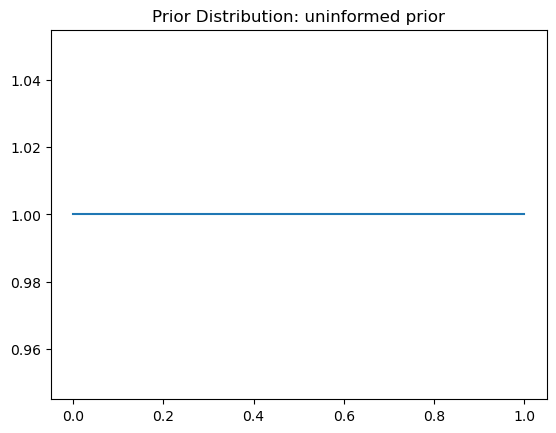

In [171]:
# uninformed prior: Plot the prior distribution

x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 1, 1)

plt.plot(x, y)
plt.title("Prior Distribution: uninformed prior")
plt.show()

**Analyse the result and plot the posterior distribution**

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


<Axes: title={'center': 'p'}>

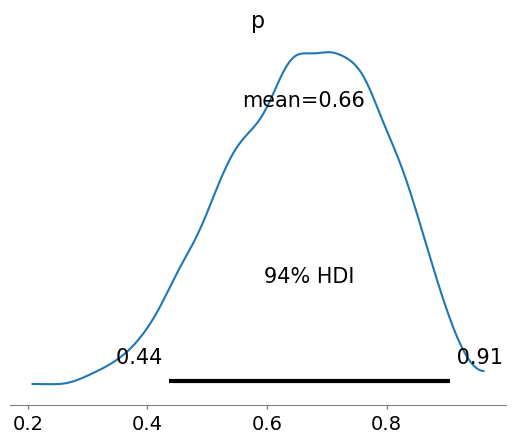

In [184]:
# Plot and analyse the result: uninformed prior

data = np.array([tosses_list_10])

trace = bayesian_model(data)

pm.plot_posterior(trace, var_names=['p'])  # Plot posterior distribution of p

**-------------------------------------------------------------------------------------------------------------------**

### **b) Weakly informed prior and small sample**

**Plot the prior distribution**

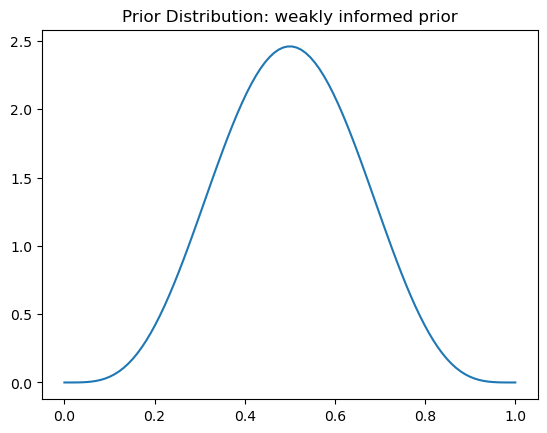

In [189]:
# Plot the prior distribution: weakly informed prior

x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 5, 5)

plt.plot(x, y)
plt.title("Prior Distribution: weakly informed prior")
plt.show()

**Analyse the result and plot the posterior distribution**

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.


<Axes: title={'center': 'p'}>

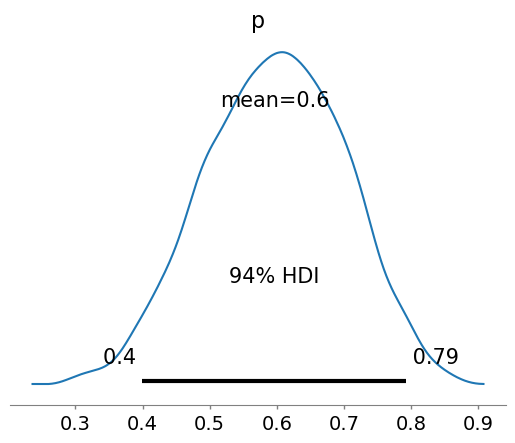

In [185]:
# Plot and analyse the result: weakly informed prior

data = np.array([tosses_list_10])

trace = bayesian_model(data, alpha=5, beta=5)

pm.plot_posterior(trace, var_names=['p'])  # Plot posterior distribution of p

**-------------------------------------------------------------------------------------------------------------------**

### c) Strongly informed prior and small sample

**Plot the prior distribution**

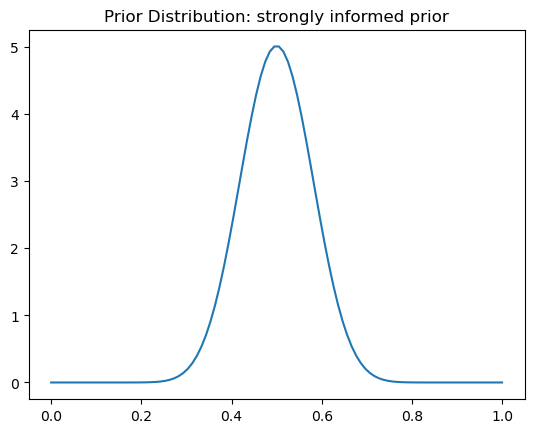

In [161]:
# Plot the prior distribution: strongly informed prior

x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 20, 20)

plt.plot(x, y)
plt.title("Prior Distribution: strongly informed prior")
plt.show()



**Analyse the result and plot the posterior distribution**

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.


<Axes: title={'center': 'p'}>

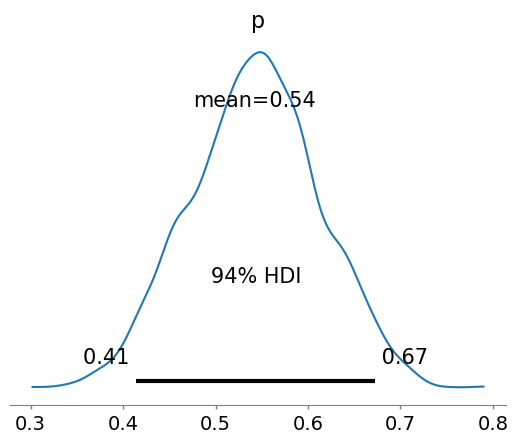

In [183]:
# Plot and analyse the result: strongly informed prior

data = np.array([tosses_list_10])

trace = bayesian_model(data, alpha=20, beta=20)

pm.plot_posterior(trace, var_names=['p'])  # Plot posterior distribution of p

### 2.4.2 Large sample analysis

### **a) Uninformed prior and large sample (100)**

**Plot the prior distribution**

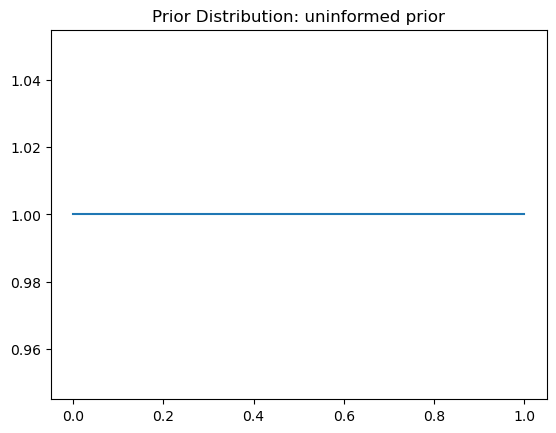

In [176]:
# uninformed prior: Plot the prior distribution

x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 1, 1)

plt.plot(x, y)
plt.title("Prior Distribution: uninformed prior")
plt.show()

**Analyse the result and plot the posterior distribution**

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.


<Axes: title={'center': 'p'}>

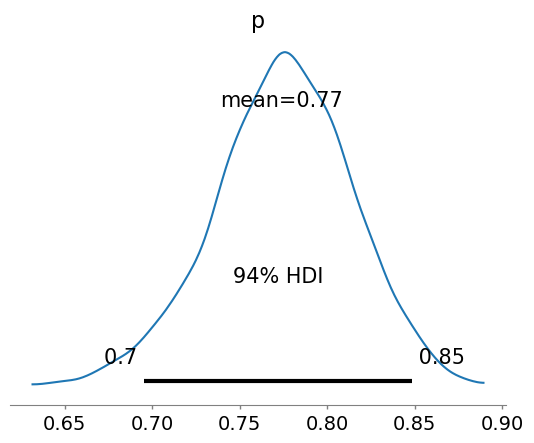

In [186]:
# Plot and analyse the result: uninformed prior

data = np.array([tosses_list_100])

trace = bayesian_model(data)

pm.plot_posterior(trace, var_names=['p'])  # Plot posterior distribution of p

**-------------------------------------------------------------------------------------------------------------------**

### **b) Weakly informed prior and large sample**

**Plot the prior distribution**

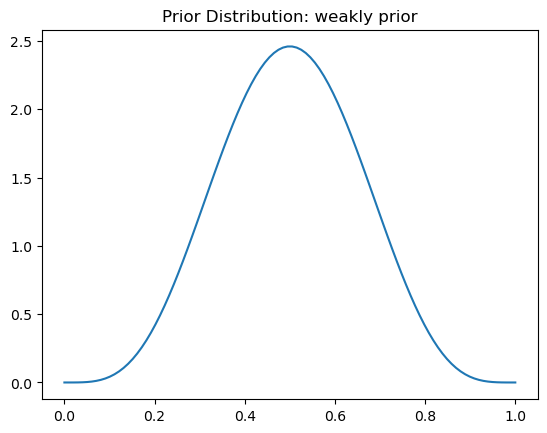

In [175]:
# Plot the prior distribution: weakly informed prior

x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 5, 5)

plt.plot(x, y)
plt.title("Prior Distribution: weakly prior")
plt.show()

**Analyse the result and plot the posterior distribution**

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.


<Axes: title={'center': 'p'}>

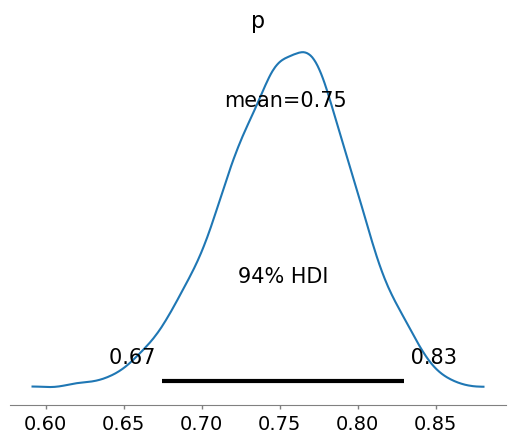

In [187]:
# Plot and analyse the result: weakly informed prior
data = np.array([tosses_list_100])

trace = bayesian_model(data, alpha=5, beta=5)

pm.plot_posterior(trace, var_names=['p'])  # Plot posterior distribution of p

**-------------------------------------------------------------------------------------------------------------------**

### c) Strongly informed prior and large sample

**Plot the prior distribution**

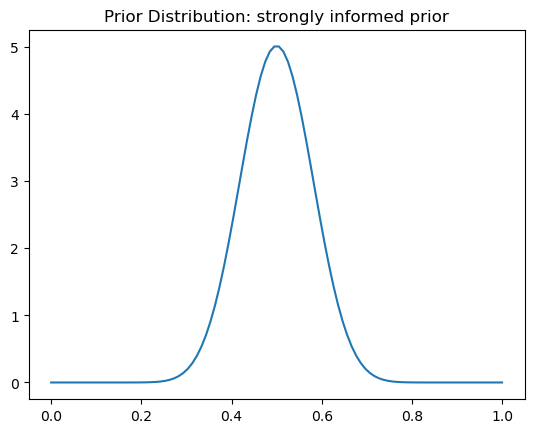

In [161]:
# Plot the prior distribution: strongly informed prior

x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 20, 20)

plt.plot(x, y)
plt.title("Prior Distribution: strongly informed prior")
plt.show()



**Analyse the result and plot the posterior distribution**

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


<Axes: title={'center': 'p'}>

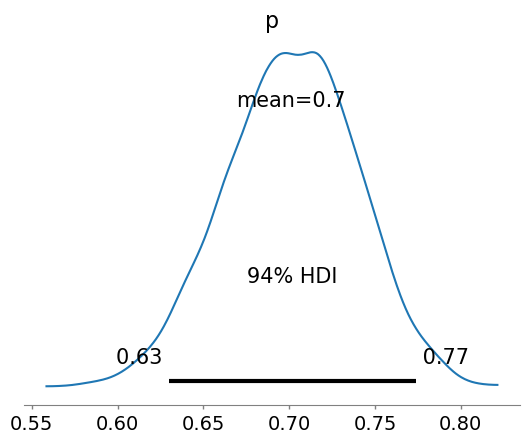

In [188]:
# Plot and analyse the result: strongly informed prior

data = np.array([tosses_list_100]) 

trace = bayesian_model(data, alpha=20, beta=20)

pm.plot_posterior(trace, var_names=['p'])  # Plot posterior distribution of p

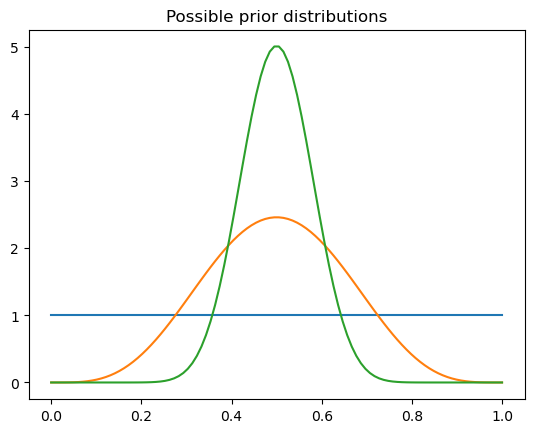

In [196]:
x = np.linspace(0, 1, 100)
y = sp.stats.beta.pdf(x, 1, 1)

a = np.linspace(0, 1, 100)
b = sp.stats.beta.pdf(x, 5, 5)

c = np.linspace(0, 1, 100)
d = sp.stats.beta.pdf(x, 20, 20)

plt.plot(x, y)
plt.plot(a, b)
plt.plot(c, d)
plt.title("Possible prior distributions")
plt.show()